In [1]:
from fastai import *
from fastai.vision import *
import re

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
path = untar_data(URLs.PETS); path

WindowsPath('D:/fastai/data/oxford-iiit-pet')

In [12]:
path.ls()
!git clone https://github.com/fastai/fastai
#os.environ['TORCH_HOME'] = 'D:'

Cloning into 'fastai'...


In [14]:
path_images = path/"images"
path_annos = path/"annotations"

In [15]:
image_names = get_image_files(path_images)

In [16]:
image_names[0]
#pat = r'\w+_\d+.jpg$'

WindowsPath('D:/fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [18]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_images, image_names, pat, size=224)

D:\Lataukset\Anaconda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
D:\Lataukset\Anaconda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default 

In [19]:
print(data.c)
data.normalize(imagenet_stats)

37


ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,Abyssinian,Abyssinian,Abyssinian,Abyssinian
Path: D:\fastai\data\oxford-iiit-pet\images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_pit_bull_terrier,staffordshire_bull_terrier,Abyssinian,Egyptian_Mau,Maine_Coon
Path: D:\fastai\data\oxford-iiit-pet\images;

Test: None

D:\Lataukset\Anaconda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
D:\Lataukset\Anaconda\envs\fastai\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default 

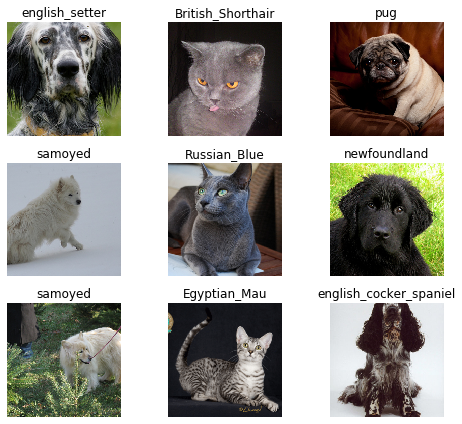

In [20]:
data.show_batch(rows=3, figsize=(7,6))

In [21]:
print(data.classes, data.c)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier'] 37


In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate).mixup()

In [34]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.444568,0.405351,0.114344,01:37
1,1.781140,0.330791,0.103518,01:48
2,1.489525,0.320874,0.092693,01:47
3,1.382079,0.290345,0.073072,01:47


In [35]:
learn.save("Mixup_first_steps")

In [44]:
learn.lr_find(1e-14, 1e-5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


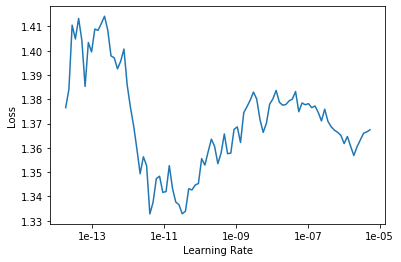

In [45]:
learn.recorder.plot(3,2)

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

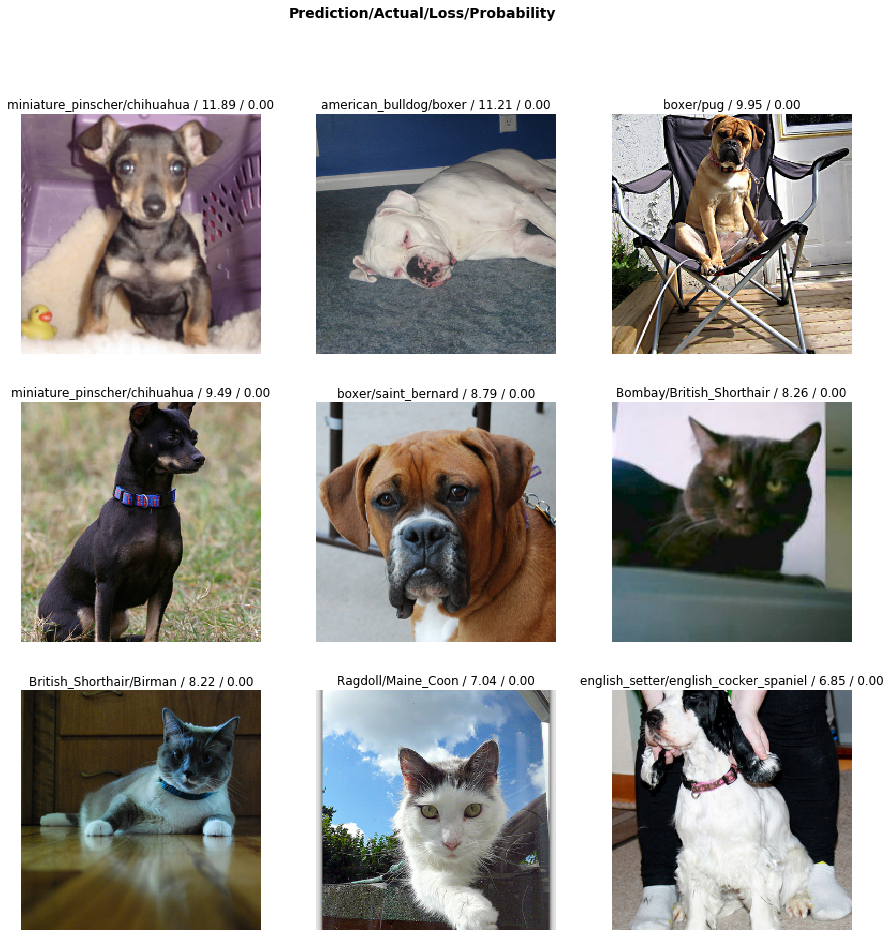

In [30]:
interp.plot_top_losses(9, figsize=(15,15))

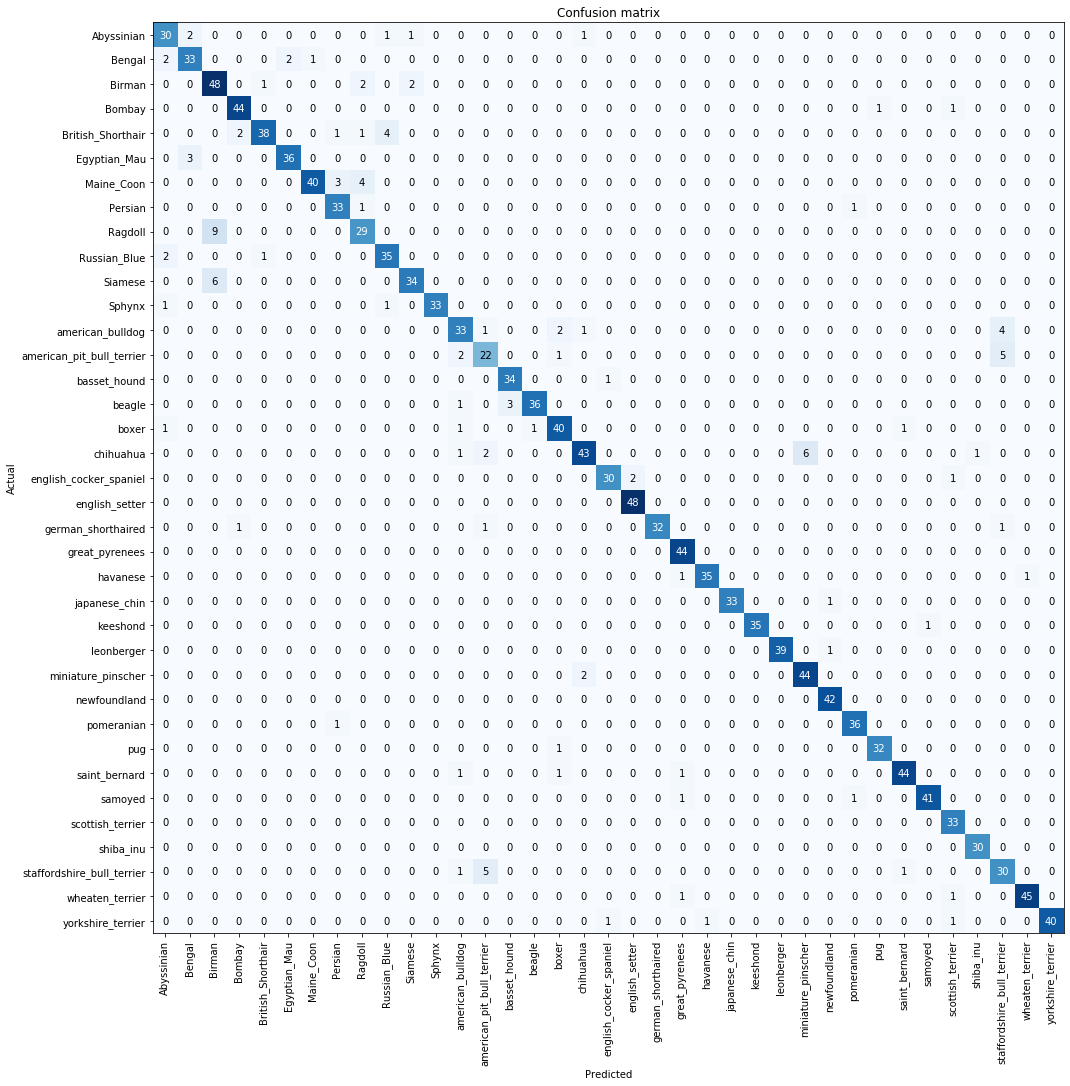

In [32]:
interp.plot_confusion_matrix(figsize=(15,15))

In [47]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 9),
 ('Siamese', 'Birman', 6),
 ('chihuahua', 'miniature_pinscher', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Maine_Coon', 'Ragdoll', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Maine_Coon', 'Persian', 3),
 ('beagle', 'basset_hound', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('miniature_pinscher', 'chihuahua', 2)]

In [50]:
learn.unfreeze()

In [51]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\queues.py", line 232, in _feed
    close()
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] Kahva ei kelpaa

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Lataukset\Anaconda\envs\fastai\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Lataukset\Anaconda\envs\fastai\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\queues.py", line 263, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times



In [54]:
learn.lr_find(1e-12, 1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [55]:
import torch
torch.cuda.get_device_name(0)

'GeForce GTX 1060'

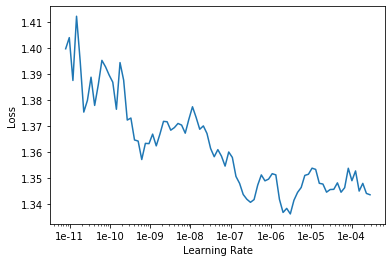

In [57]:
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(3, max_lr=slice(1e-10, 1e-07))

epoch,train_loss,valid_loss,error_rate,time
0,1.299196,0.292085,0.076455,01:50
1,1.335672,0.289031,0.072395,01:51
2,1.330050,0.291367,0.075778,01:51


In [59]:
learn.save("With_mixup2")

In [61]:
interp = ClassificationInterpretation.from_learner(learn)

In [62]:
interp.most_confused()

[('British_Shorthair', 'Russian_Blue', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('chihuahua', 'miniature_pinscher', 5),
 ('Siamese', 'Birman', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('Birman', 'Ragdoll', 3),
 ('Birman', 'Siamese', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Bengal', 'Abyssinian', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('British_Shorthair', 'Ragdoll', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('boxer', 'american_bulldog', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('german_shorthaired', 'american_pit_bull_terrier', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('miniature_pinscher', 'ame

In [63]:
learn.save("With_mixup3")

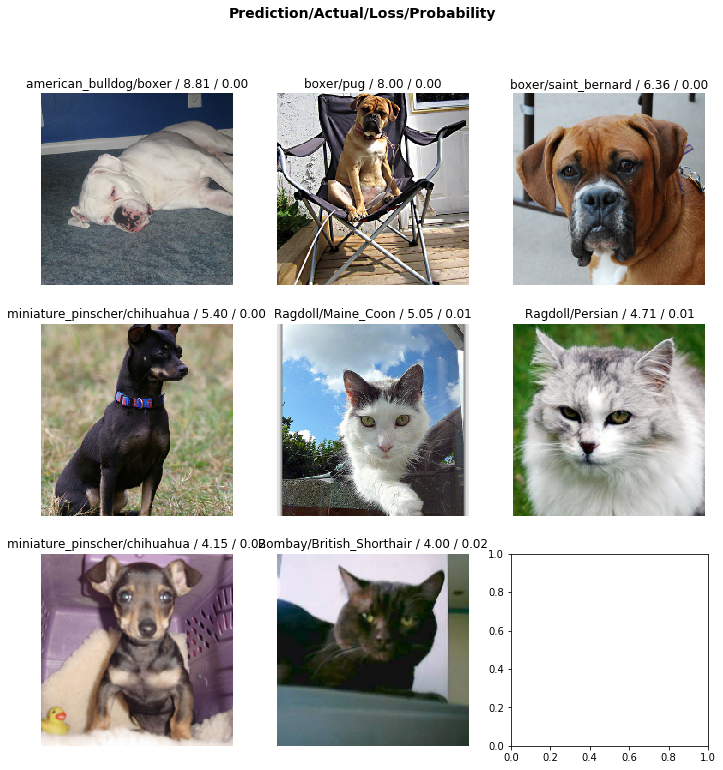

In [75]:
interp.plot_top_losses(8)

In [76]:
folder = "pizza"
file = "urls_pizza.csv"

In [88]:
path = Path("data/food")
dest = Path("data/cake")


In [82]:
path.ls()

[WindowsPath('data/food/download')]

In [79]:
path = Path("data")

In [89]:
download_images(path/"download", dest)

In [90]:
path= Path("data")

In [87]:
path.ls()

[WindowsPath('data/pizza/00000000.jpg'),
 WindowsPath('data/pizza/00000001.jpg'),
 WindowsPath('data/pizza/00000002.jpg'),
 WindowsPath('data/pizza/00000003.jpg'),
 WindowsPath('data/pizza/00000004.jpg'),
 WindowsPath('data/pizza/00000005.jpg'),
 WindowsPath('data/pizza/00000006.jpg'),
 WindowsPath('data/pizza/00000007.jpg'),
 WindowsPath('data/pizza/00000008.jpg'),
 WindowsPath('data/pizza/00000009.jpg'),
 WindowsPath('data/pizza/00000010.jpg'),
 WindowsPath('data/pizza/00000011.jpg'),
 WindowsPath('data/pizza/00000012.jpg'),
 WindowsPath('data/pizza/00000013.jpg'),
 WindowsPath('data/pizza/00000014.jpg'),
 WindowsPath('data/pizza/00000015.jpg'),
 WindowsPath('data/pizza/00000016.jpg'),
 WindowsPath('data/pizza/00000017.jpg'),
 WindowsPath('data/pizza/00000018.jpg'),
 WindowsPath('data/pizza/00000019.jpg'),
 WindowsPath('data/pizza/00000020.jpg'),
 WindowsPath('data/pizza/00000021.jpg'),
 WindowsPath('data/pizza/00000022.jpg'),
 WindowsPath('data/pizza/00000023.jpg'),
 WindowsPath('da

In [91]:

classes = ["pizza", "cake"]
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)



pizza


cake


In [24]:
path=Path("data/food/cake")
path.ls()


[WindowsPath('data/food/cake/train'), WindowsPath('data/food/cake/valid')]

In [25]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path,size=224)


In [26]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (108 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cake,cake,cake,cake,cake
Path: data\food\cake;

Valid: LabelList (52 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cake,cake,cake,cake,cake
Path: data\food\cake;

Test: None

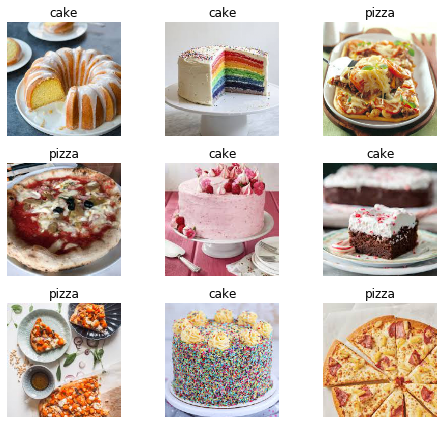

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [27]:
pizza_bot = cnn_learner(data, models.resnet18, metrics=error_rate).mixup()

In [112]:
pizza_bot.lr_find(1e-03, end_lr=10, num_it=25)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception ignored in: <function _ConnectionBase.__del__ at 0x00000174B45E2438>
Traceback (most recent call last):
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\connection.py", line 132, in __del__
    self._close()
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] Kahva ei kelpaa


In [28]:
pizza_bot.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.179145,2.893930,0.480769,00:31
1,1.403846,0.273791,0.115385,00:30
2,1.158253,0.260779,0.096154,00:30
3,0.981781,0.238996,0.096154,00:31


In [29]:
interp = ClassificationInterpretation.from_learner(pizza_bot)

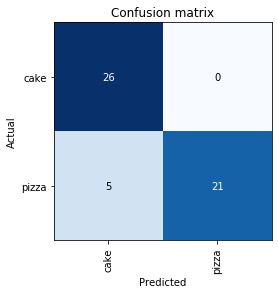

In [35]:
interp.plot_confusion_matrix()

In [37]:
pizza_bot.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\queues.py", line 232, in _feed
    close()
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] Kahva ei kelpaa

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Lataukset\Anaconda\envs\fastai\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "D:\Lataukset\Anaconda\envs\fastai\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "D:\Lataukset\Anaconda\envs\fastai\lib\multiprocessing\queues.py", line 263, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times



BrokenPipeError: [Errno 32] Broken pipe

In [32]:
pizza_bot.recorder.plot()

AttributeError: 'Learner' object has no attribute 'lrs'

In [31]:
pizza_bot.save("pizza_bot_withmixup")

In [19]:
pizza_bot.fit_one_cycle(2, max_lr=1e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.087438,0.366591,0.173077,00:33
1,0.068066,0.256137,0.057692,00:35


In [20]:
pizza_bot.save("pizza_bot2")

In [21]:
pizza_bot.fit_one_cycle(2, max_lr=1e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.002061,0.257689,0.076923,00:30
1,0.002255,0.348545,0.057692,00:30


In [22]:
pizza_bot.fit_one_cycle(4, max_lr=1e-02)

epoch,train_loss,valid_loss,error_rate,time
0,0.037227,0.339705,0.057692,00:31
1,0.019390,0.411505,0.057692,00:30
2,0.017169,0.425325,0.038462,00:32
3,0.012794,0.417939,0.038462,00:31
